In [18]:
# Libraries Used 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import robin_stocks as r 
import pyotp

from pandas_datareader import data as wb

# Magic
%matplotlib inline

In [19]:
# Collect historical prices by Yahoo! Finance est. 2000 
tickers = ['AAPL', 'BABA', 'TSLA', 'JNJ', 'SPHD', 'AMZN']
start_date = '2000-01-01'
historical_data = pd.DataFrame()
for t in tickers:
    historical_data[t] = wb.DataReader(t, data_source='yahoo', start=start_date)['Adj Close']

In [20]:
# Remove all rows that includes NaN values
# Check if all columns match and are float variables
historical_data = historical_data.dropna()
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1489 entries, 2014-09-19 to 2020-08-18
Data columns (total 6 columns):
AAPL    1489 non-null float64
BABA    1489 non-null float64
TSLA    1489 non-null float64
JNJ     1489 non-null float64
SPHD    1489 non-null float64
AMZN    1489 non-null float64
dtypes: float64(6)
memory usage: 81.4 KB


In [21]:
historical_data.head()

,AAPL,BABA,TSLA,JNJ,SPHD,AMZN
Date,,,,,,
2014-09-19,91.730469,93.889999,259.320007,92.295212,24.605312,331.320007
2014-09-22,91.821304,89.889999,250.029999,92.201202,24.534039,324.500000
2014-09-23,93.256874,87.169998,250.410004,91.842239,24.383572,323.630005
2014-09-24,92.448242,90.570000,252.139999,92.850746,24.486519,328.209991
2014-09-25,88.922958,88.919998,246.949997,91.534569,24.296457,321.929993


In [22]:
historical_data.tail()

,AAPL,BABA,TSLA,JNJ,SPHD,AMZN
Date,,,,,,
2020-08-12,452.040009,255.190002,1554.760010,149.660004,35.040001,3162.239990
2020-08-13,460.040009,253.720001,1621.000000,148.000000,34.639999,3161.020020
2020-08-14,459.630005,253.970001,1650.709961,148.240005,34.759998,3148.020020
2020-08-17,458.429993,256.959991,1835.640015,148.990005,34.610001,3182.409912
2020-08-18,460.410004,258.644989,1897.555054,148.869995,34.430000,3280.699951


In [23]:
# Calculate log returns of each companies 
# Check if all columns match and are float variables
returns = np.log(historical_data/historical_data.shift(1))
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1489 entries, 2014-09-19 to 2020-08-18
Data columns (total 6 columns):
AAPL    1488 non-null float64
BABA    1488 non-null float64
TSLA    1488 non-null float64
JNJ     1488 non-null float64
SPHD    1488 non-null float64
AMZN    1488 non-null float64
dtypes: float64(6)
memory usage: 81.4 KB


In [24]:
returns.head()

,AAPL,BABA,TSLA,JNJ,SPHD,AMZN
Date,,,,,,
2014-09-19,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-22,0.000990,-0.043537,-0.036482,-0.001019,-0.002901,-0.020799
2014-09-23,0.015513,-0.030726,0.001519,-0.003901,-0.006152,-0.002685
2014-09-24,-0.008709,0.038263,0.006885,0.010921,0.004213,0.014053
2014-09-25,-0.038879,-0.018386,-0.020799,-0.014277,-0.007792,-0.019320


In [25]:
returns.tail()

,AAPL,BABA,TSLA,JNJ,SPHD,AMZN
Date,,,,,,
2020-08-12,0.032694,0.026888,0.123311,0.018138,0.001714,0.026134
2020-08-13,0.017543,-0.005777,0.041722,-0.011154,-0.011481,-0.000386
2020-08-14,-0.000892,0.000985,0.018162,0.001620,0.003458,-0.004121
2020-08-17,-0.002614,0.011704,0.106188,0.005047,-0.004325,0.010865
2020-08-18,0.004310,0.006536,0.033173,-0.000806,-0.005214,0.030418


In [26]:
# Create a table for Daily and Annual Risk Returns 
# Daily mean formula: daily_mean = returns.mean()
# Daily stdv formula: daily_mean = returns.std()
# Annual mean formula: annual_mean = returns.mean()*250
# Annual stdv formula: annual_mean = returns.std()*250 ** .5

daily_mean = []
daily_stdv = []

annual_mean = []
annual_stdv = []

for t in tickers:
    daily_mean.append(round(returns[t].mean()*100, 2))
    daily_stdv.append(round(returns[t].std()*100, 2))
    
    annual_mean.append(round((returns[t].mean()*250)*100, 2))
    annual_stdv.append(round((returns[t].std()*250**.5)*100, 2))

daily_mean = np.array(daily_mean)
daily_stdv = np.array(daily_stdv)
annual_mean = np.array(annual_mean)
annual_stdv = np.array(annual_stdv)
annual_stdv

array([28.44, 32.58, 52.43, 19.32, 18.99, 30.24])

In [27]:
# Create DataFrame for returns and risk 
returns_data = pd.DataFrame({'Symbol':tickers, 
                             'Daily Average Return (%)':daily_mean,
                             'Daily Risk (%)':daily_stdv,
                             'Annual Average Return (%)':annual_mean,
                             'Annual Risk (%)':annual_stdv
                            })
returns_data

,Symbol,Daily Average Return (%),Daily Risk (%),Annual Average Return (%),Annual Risk (%)
0,AAPL,0.11,1.80,27.10,28.44
1,BABA,0.07,2.06,17.03,32.58
2,TSLA,0.13,3.32,33.44,52.43
3,JNJ,0.03,1.22,8.03,19.32
4,SPHD,0.02,1.20,5.64,18.99
5,AMZN,0.15,1.91,38.52,30.24


In [28]:
# Returns the lowest return in history between 09-30-2014 to now
returns.idxmin() 

AAPL   2020-03-16
BABA   2015-01-29
TSLA   2020-03-16
JNJ    2018-12-14
SPHD   2020-03-16
AMZN   2014-10-24
dtype: datetime64[ns]

In [29]:
# Returns the highest return in history between 09-30-2014 to now
returns.idxmax()

AAPL   2020-03-13
BABA   2017-06-08
TSLA   2020-02-03
JNJ    2020-03-30
SPHD   2020-03-24
AMZN   2015-04-24
dtype: datetime64[ns]

In [30]:
# Covariance daily
# Determines if there is a relationship between two stocks, whether they move together:
# positively, negatively, or neutral 
return_cov = returns.cov()
return_cov

,AAPL,BABA,TSLA,JNJ,SPHD,AMZN
AAPL,0.000324,0.000173,0.000222,0.000096,0.000121,0.000184
BABA,0.000173,0.000425,0.000223,0.000069,0.000087,0.000189
TSLA,0.000222,0.000223,0.001099,0.000077,0.000137,0.000230
JNJ,0.000096,0.000069,0.000077,0.000149,0.000086,0.000077
SPHD,0.000121,0.000087,0.000137,0.000086,0.000144,0.000079
AMZN,0.000184,0.000189,0.000230,0.000077,0.000079,0.000366


In [31]:
# Covariance yearly
# Determines if there is a relationship between two stocks, whether they move together:
# positively, negatively, or neutral 
return_cov = returns.cov()*250
return_cov

,AAPL,BABA,TSLA,JNJ,SPHD,AMZN
AAPL,0.080905,0.043217,0.055492,0.023989,0.030205,0.045952
BABA,0.043217,0.106129,0.055761,0.017193,0.021634,0.047288
TSLA,0.055492,0.055761,0.274874,0.019142,0.034148,0.057531
JNJ,0.023989,0.017193,0.019142,0.037332,0.021573,0.019211
SPHD,0.030205,0.021634,0.034148,0.021573,0.036044,0.019834
AMZN,0.045952,0.047288,0.057531,0.019211,0.019834,0.091424


In [32]:
# Correlations
# Determines how close the relationship are between two stocks
return_corr = returns.corr()
return_corr

,AAPL,BABA,TSLA,JNJ,SPHD,AMZN
AAPL,1.000000,0.466393,0.372115,0.436509,0.559347,0.534301
BABA,0.466393,1.000000,0.326472,0.273139,0.349789,0.480072
TSLA,0.372115,0.326472,1.000000,0.188963,0.343065,0.362913
JNJ,0.436509,0.273139,0.188963,1.000000,0.588092,0.328840
SPHD,0.559347,0.349789,0.343065,0.588092,1.000000,0.345517
AMZN,0.534301,0.480072,0.362913,0.328840,0.345517,1.000000


In [33]:
no_assets = len(tickers)

In [34]:
pflio_ret = []
pflio_vol = [] 
pflio_wei = []

for x in range(50000):
    weights = np.random.random(no_assets)
    weights /= np.sum(weights)
    
    pflio_wei.append(weights)
    pflio_ret.append(np.sum(weights*returns.mean())*250)
    pflio_vol.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov()*250, weights))))
    #print(x, weights)

pflio_wei = np.array(pflio_wei)
pflio_ret = np.array(pflio_ret)
pflio_vol = np.array(pflio_vol)

print(np.sum(weights))
#pflio_returns, pflio_volatilities

1.0


In [35]:
pflio_scenarios = pd.DataFrame({'Return': pflio_ret, 'Volatility': pflio_vol})
#pflio_scenarios = pflio_scenarios.sort_values('Return', ascending=True)
pflio_scenarios.to_csv("ret_vol_index.csv")

In [36]:
pflio_scenarios.head()
#pflio_scenarios['Return']

,Return,Volatility
0,0.245446,0.246152
1,0.211978,0.210237
2,0.225811,0.242373
3,0.201383,0.196320
4,0.188291,0.199473


In [37]:
pflio_scenarios.tail()

,Return,Volatility
49995,0.184474,0.203439
49996,0.238880,0.219385
49997,0.233404,0.232944
49998,0.190673,0.215223
49999,0.252789,0.242286


In [47]:
for i in range(50000):
    if pflio_scenarios['Return'][i] > 0.30 and pflio_scenarios['Volatility'][i] < 0.24:
        print(pflio_scenarios.iloc[i])

Return        0.301018
Volatility    0.239420
Name: 9646, dtype: float64
Return        0.304543
Volatility    0.237535
Name: 12532, dtype: float64
Return        0.307976
Volatility    0.238647
Name: 19722, dtype: float64
Return        0.302800
Volatility    0.236329
Name: 28489, dtype: float64


Text(0, 0.5, 'Expected Return')

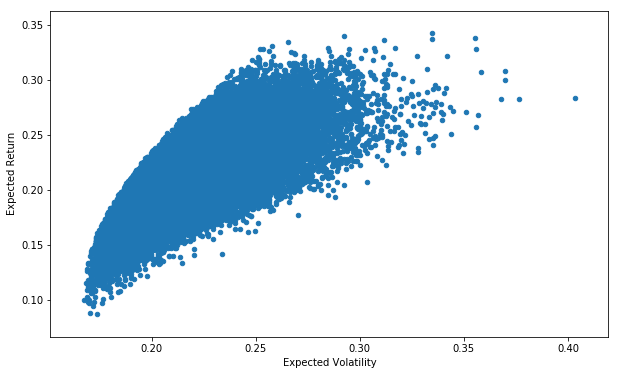

In [39]:
# Efficient Frontier 
pflio_scenarios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [48]:
index = 19722
pfolio_wei2 = []
tickers2 = []
tickers2 = np.array(tickers)
pflio_wei2 = pflio_wei[index]

print(pflio_scenarios.iloc[index])
tickers_df = pd.DataFrame({'Symbol':tickers})

ideal_portfolio = pd.DataFrame({'Weights': pflio_wei2})
ideal_portfolio = pd.concat([tickers_df, ideal_portfolio], axis=1)
ideal_portfolio = ideal_portfolio.sort_values('Weights', ascending=False)
ideal_portfolio

Return        0.307976
Volatility    0.238647
Name: 19722, dtype: float64


,Symbol,Weights
5,AMZN,0.543588
0,AAPL,0.237998
3,JNJ,0.126442
2,TSLA,0.061179
4,SPHD,0.015637
1,BABA,0.015155


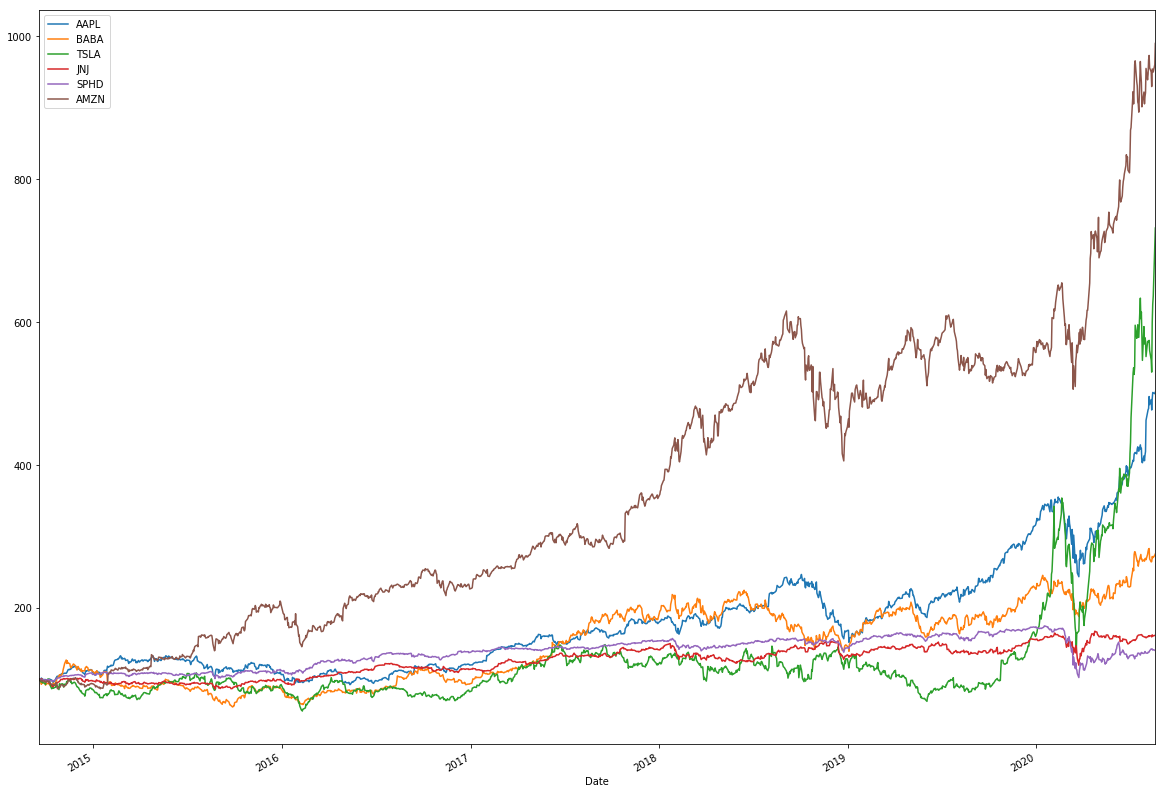

In [41]:
(historical_data/historical_data.iloc[0]*100).plot(figsize=(20,15))

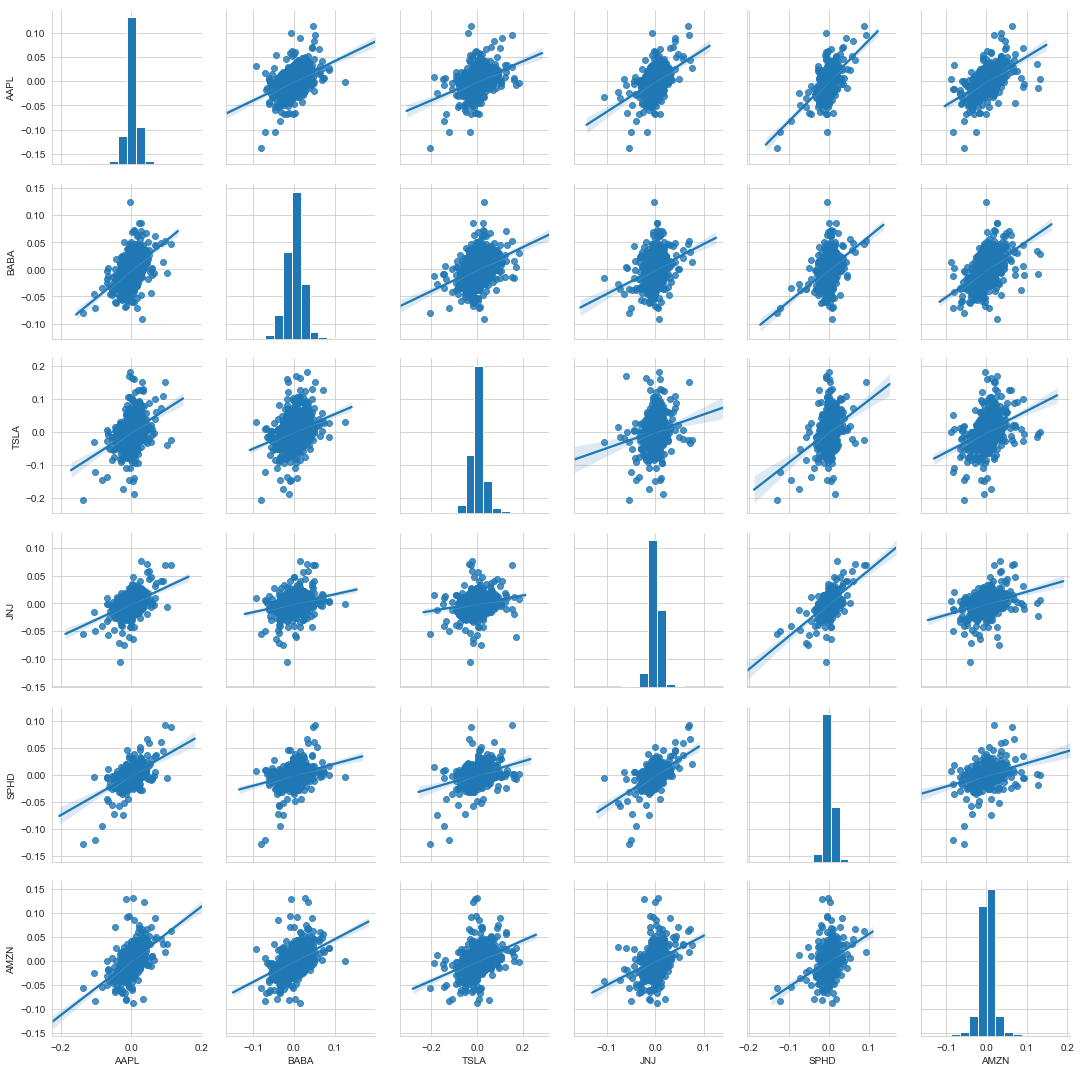

In [42]:
sns.set_style('whitegrid')
regression = sns.pairplot(returns[1:], kind="reg")
regression

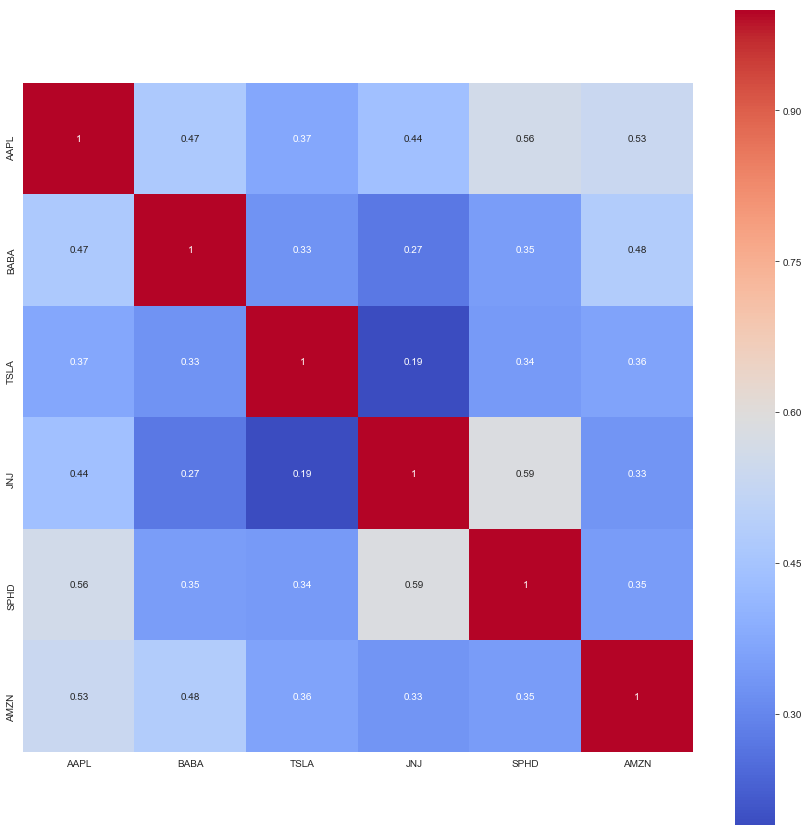

In [43]:
# Excatly -1: Perfect negative relationship 
# -0.70:      Strong negative relationship
# -0.50:      Moderate negative relationship
# -0.30:      Weak negative relationship
#  0.00:      No correlation
# +0.30:      Weak positive relationship
# +0.50:      Moderate positive relationship
# +0.70:      Strong positive relationship
# Exactly +1: Perfect positive relationship

plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(return_corr, annot=True, square=True, cmap='coolwarm')
heatmap


## Notes

- Sell all JD after BABA earning calls (August 20)
- Sell 6% of BABA shares after earning calls (August 20)
- Re-run what happens after TSLA stock split 
- Re-run what happens after AAPL stock split
- Buy 8% JNJ shares